---
# 프로젝트명 : 가상데이터를 활용한 분류모델 생성 및 시각화
## 프로젝트목표
    - 다양한 분류 모델의 생성
    - 훈련된 모델의 결과를 해석하는 방법 습득
    - 훈련된 모델의 결과를 시각화

## 프로젝트구성
    - Naive Bayes, KNN, SVM, Decision Tree의 모델 생성
    - 각각의 모델을 훈련 후 테스트 데이터로 예측
    - 예측된 결과 해석
    - 예측된 결과를 시각화

- 작성자: 이준호 감수자
---

In [0]:
# 라이브러리 import
import pandas as pd
import numpy as np
import math
import operator

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### 더미 데이터

- 본 프로젝트에서 사용하는 데이터셋은 make_blobs 함수를 사용하여 더미데이터를 활용한다.
- make_blobs 함수는 등방성 가우시안 정규분포를 이용해 가상 데이터를 생성한다.
- 매개변수
  - n_samples : 표본 데이터의 수, 디폴트 100
  - n_features : 독립 변수의 수, 디폴트 20
  - centers : 생성할 클러스터의 수 혹은 중심, [n_centers, n_features] 크기의 배열. 디폴트 3
  - cluster_std: 클러스터의 표준 편차, 디폴트 1.0
  - center_box: 생성할 클러스터의 바운딩 박스(bounding box), 디폴트 (-10.0, 10.0))

# Naive Bayes
특성들 사이의 독립을 가정하는 베이즈 정리를 적용한 확률 분류기의 일종

### 더미데이터 생성

In [0]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

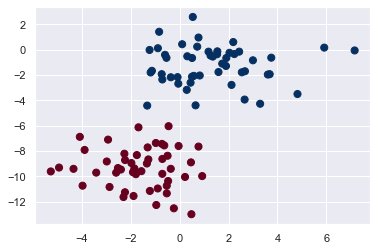

In [0]:
# 생성된 데이터의 시각화
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [0]:
#훈련 데이터와 테스트데이터의 분리
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

print(f'TRAINING   X : {train_x.shape} , Y : {train_y.shape}')
print(f'TESTING    X : {test_x.shape} , Y : {test_y.shape}')

TRAINING   X : (80, 2) , Y : (80,)
TESTING    X : (20, 2) , Y : (20,)


## Q.  Modeling
- Naive Bayes의 모델을 생성한 뒤 훈련데이터로 훈련을 시키시오.(hint:GaussianNB)
- 테스트데이터로 결과를 예측하고 해석하시오.(hint:classification_report)

In [0]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(train_x, train_y)
y_pred = model.predict(test_x)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        13

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



## Q. Visualization
- 학습된 모델이 어떻게 경계를 나누고 있는지 확인을 하기위해 시작화를 하시오.(hint:matplotlib)
- 더미데이터 2000개를 만들고, 만들어진 데이터를 모델로 예측해서 배경으로 채우시오.(hint: np.random.RandomState, predict)

In [0]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

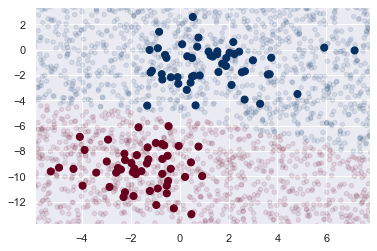

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
# 배경으로 다른 scatter 부분들을 채웁니다
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

# k-NN
k-최근접 이웃 알고리즘(또는 줄여서 k-NN)은 분류나 회귀에 사용되는 비모수 방식이다.

In [0]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

### 더미데이터 생성

In [0]:
X, y = make_blobs(n_features=2, centers=3)

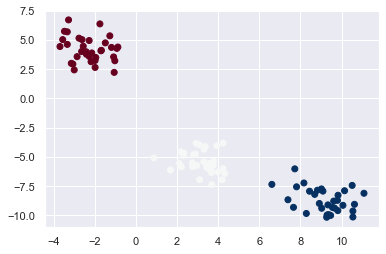

In [0]:
# 생성된 데이터의 시각화
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu')

In [0]:
#훈련 데이터와 테스트데이터의 분리
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

print(f'TRAINING   X : {train_x.shape} , Y : {train_y.shape}')
print(f'TESTING    X : {test_x.shape} , Y : {test_y.shape}')

TRAINING   X : (80, 2) , Y : (80,)
TESTING    X : (20, 2) , Y : (20,)


## Q. Modeling
- k-NN 모델을 생성한 뒤 훈련데이터로 훈련을 시키시오.(hint:KNeighborsClassifier)
- 테스트데이터로 결과를 예측하고 해석하시오.(hint:classification_report)

In [0]:
model = KNeighborsClassifier()
model.fit(train_x, train_y)
y_pred = model.predict(test_x)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



## Q. Visualization
- 학습된 모델이 어떻게 경계를 나누고 있는지 확인을 하기위해 시작화를 하시오.(hint:matplotlib)

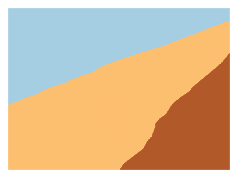

In [0]:
h = .02 # step size in the mesh

# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(4, 3))
plt.set_cmap(plt.cm.Paired)

plt.scatter(X[:,0], X[:,1],c=y)
plt.pcolormesh(xx, yy, Z, alpha=0.5)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

# Support Vector Machine
두 카테고리 중 어느 하나에 속한 데이터의 집합이 주어졌을 때, Support Vector Machine(이하 SVM) 알고리즘은 주어진 데이터 집합을 바탕으로 하여 새로운 데이터가 어느 카테고리에 속할지 판단하는 비확률적 이진 선형 분류 모델을 만든다. 

### 더미데이터의 생성

In [0]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

C:\Users\naram\anaconda3\envs\ev_map\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


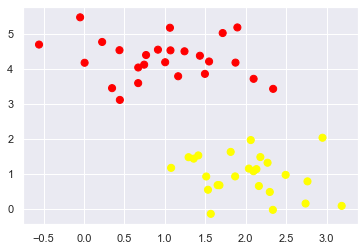

In [0]:
# 생성된 데이터의 시각화
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

In [0]:
#훈련 데이터와 테스트데이터의 분리
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

print(f'TRAINING   X : {train_x.shape} , Y : {train_y.shape}')
print(f'TESTING    X : {test_x.shape} , Y : {test_y.shape}')

TRAINING   X : (40, 2) , Y : (40,)
TESTING    X : (10, 2) , Y : (10,)


두개의 점을 하나의 직선으로 나누고자 할때 아래 그림과 같이 여러 방법이 있을 것이다.  
SVM 알고리즘은 두개의 Class의 간격을 최고로 많이 벌린 간격(Margin)을 구한다.  
이때 매우 엄격하게 두 개의 class를 분리하는 것을 HardMarin이라하고 좀더 유연하게 분리하는 것을 SoftMargin이라 한다.

(-1, 3.5)

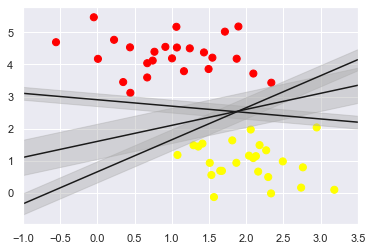

In [0]:
xfit = np.linspace(-1, 3.5)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit-d, yfit + d, 
                     edgecolor='none',
                     color='#AAAAAA', 
                     alpha=0.4)

plt.xlim(-1, 3.5)

## Q. Modeling
- k-NN 모델을 생성한 뒤 훈련데이터로 훈련을 시키시오.(hint:SVC)
- 테스트데이터로 결과를 예측하고 해석하시오.(hint:classification_report)

In [0]:
from sklearn.svm import SVC

model = SVC(kernel='linear', C=1E10)
model.fit(train_x, train_y)
y_pred = model.predict(test_x)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



## Q. Visualization

- 학습된 모델이 어떻게 경계를 나누고 있는지 확인을 하기위해 시작화를 하시오.(hint:matplotlib)
- HardMargin과 SoftMargin을 확인하기 위해 매개변수 C의 값을 10과 0.1로 주어 모델을 훈련시키고 시각화를 하시오.

In [0]:
def plot_svc_decision_function(model, ax):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    axi.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    axi.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1],
               s=300, linewidth=1, facecolors='none');
    
    axi.set_xlim(xlim)
    axi.set_ylim(ylim)

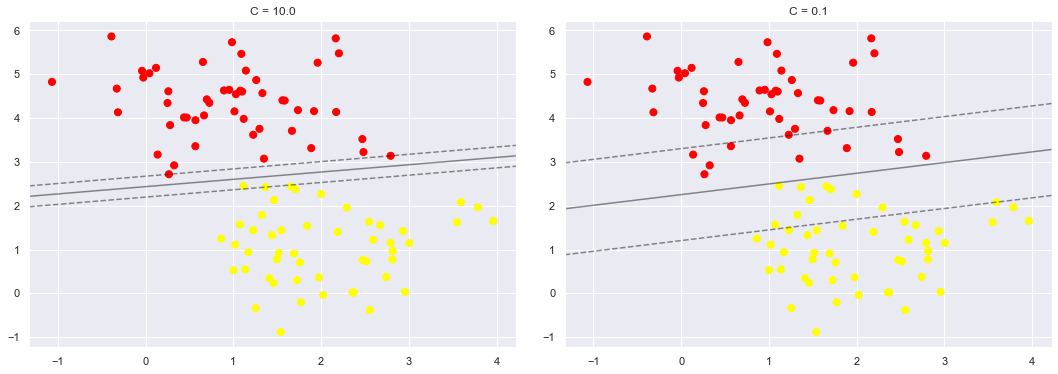

In [0]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none')
    axi.set_title(f'C = {C}')

# DecisionTree
결정 트리 학습법(decision tree learning)은 어떤 항목에 대한 관측값과 목표값을 연결시켜주는 예측 모델로써 결정 트리를 사용한다.

### 더미데이터의 생성

In [0]:
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)

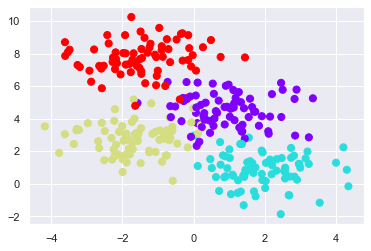

In [0]:
# 생성된 데이터의 시각화
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

In [0]:
#훈련 데이터와 테스트데이터의 분리
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

print(f'TRAINING   X : {train_x.shape} , Y : {train_y.shape}')
print(f'TESTING    X : {test_x.shape} , Y : {test_y.shape}')

TRAINING   X : (240, 2) , Y : (240,)
TESTING    X : (60, 2) , Y : (60,)


## Q. Modeling

- k-NN 모델을 생성한 뒤 훈련데이터로 훈련을 시키시오.(hint:DecisionTreeClassifier)
- 테스트데이터로 결과를 예측하고 해석하시오.(hint:classification_report)

In [0]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(train_x, train_y)
y_pred = model.predict(test_x)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.95      1.00      0.97        19
           2       1.00      0.83      0.91        12
           3       0.94      1.00      0.97        15

    accuracy                           0.93        60
   macro avg       0.94      0.92      0.93        60
weighted avg       0.94      0.93      0.93        60



## Q. Visualization
- 학습된 모델이 어떻게 경계를 나누고 있는지 확인을 하기위해 시작화를 하시오.(hint:matplotlib)

C:\Users\naram\anaconda3\envs\ev_map\lib\site-packages\ipykernel_launcher.py:20: UserWarning: The following kwargs were not used by contour: 'clim'


[(-2.494925513419171, 10.867910112115798),
 (-4.6223371064746015, 4.7954450743727755)]

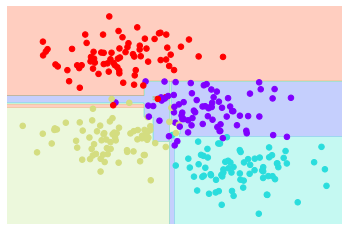

In [0]:
ax = plt.gca()
ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='rainbow',
           clim=(y.min(), y.max()), zorder=3)
ax.axis('tight')
ax.axis('off')

xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                     np.linspace(*ylim, num=200))

z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

n_classes = len(np.unique(y))

ax.contourf(xx, yy, z, alpha=0.3,
                       levels=np.arange(n_classes + 1) - 0.5,
                       cmap='rainbow', clim=(y.min(), y.max()),
                       zorder=1)

ax.set(xlim=xlim, ylim=ylim)